## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.regularizers import l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = Input(input_shape)
    x = Dense(units=num_neurons[0],
              activation=None,
              name='hidden_layer_0',
              kernel_regularizer=l1_l2(1e-12,1e-12))(input_layer)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    for i, neurons in enumerate(num_neurons):
        x = Dense(units=neurons,
                  activation=None,
                  name='hidden_layer_{0}'.format(str(i+1)),
                  kernel_regularizer=l1_l2(1e-12,1e-12))(x)
        x = Activation('relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.2)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [14]:
LEARNING_RATE = 1e-3
EPOCHS = 100
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [15]:
# 載入 Callbacks
from keras.callbacks import EarlyStopping

earlystops = [ EarlyStopping(monitor="val_acc", patience=10, verbose=1),
               EarlyStopping(monitor="val_acc", patience=25, verbose=1) ]
results = {}

for i, earlystop in enumerate(earlystops):
    keras.backend.clear_session()
    model = build_mlp(x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True, decay=1e-6)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop])
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-{0}".format(i)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_0 (Dense)       (None, 512)               1573376   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
__________

50000/50000 [==============================] - 2s 39us/step - loss: 1.8220 - acc: 0.3683 - val_loss: 1.6156 - val_acc: 0.4253
Epoch 41/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.8049 - acc: 0.3735 - val_loss: 1.6102 - val_acc: 0.4276
Epoch 42/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.8098 - acc: 0.3723 - val_loss: 1.6101 - val_acc: 0.4255
Epoch 43/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.8046 - acc: 0.3730 - val_loss: 1.6057 - val_acc: 0.4305
Epoch 44/100
50000/50000 [==============================] - 2s 38us/step - loss: 1.7898 - acc: 0.3768 - val_loss: 1.6024 - val_acc: 0.4306
Epoch 45/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.7912 - acc: 0.3759 - val_loss: 1.6009 - val_acc: 0.4318
Epoch 46/100
50000/50000 [==============================] - 2s 38us/step - loss: 1.7864 - acc: 0.3778 - val_loss: 1.5948 - val_acc: 0.4341
Epoch 47/100
50000/50000 [==============

50000/50000 [==============================] - 2s 39us/step - loss: 1.6087 - acc: 0.4290 - val_loss: 1.4931 - val_acc: 0.4658
Epoch 100/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.6065 - acc: 0.4279 - val_loss: 1.4910 - val_acc: 0.4692
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_0 (Dense)       (None, 512)               1573376   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
________

50000/50000 [==============================] - 2s 40us/step - loss: 1.6164 - acc: 0.4267 - val_loss: 1.5033 - val_acc: 0.4610
Epoch 98/100
50000/50000 [==============================] - 2s 38us/step - loss: 1.6129 - acc: 0.4293 - val_loss: 1.5017 - val_acc: 0.4640
Epoch 99/100
50000/50000 [==============================] - 2s 37us/step - loss: 1.6120 - acc: 0.4302 - val_loss: 1.4994 - val_acc: 0.4655
Epoch 100/100
50000/50000 [==============================] - 2s 37us/step - loss: 1.6125 - acc: 0.4300 - val_loss: 1.4974 - val_acc: 0.4658


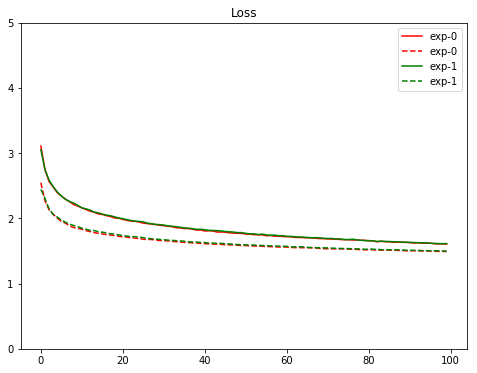

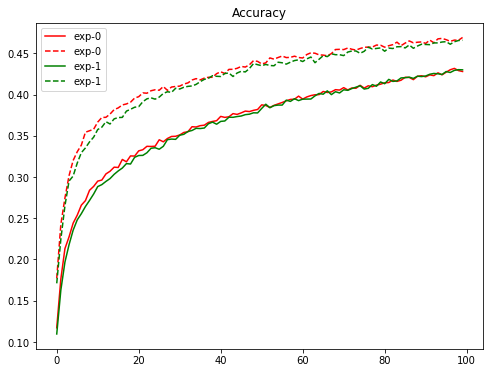

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()